# Supervised Learning and Linear Methods.
## Instructions and Requirements:
This week workshop will have two sections:

*   Section-1: Multiple Linear Regression with Machine Learning Approach.
  *   Objectives:
      *   Understand the steps included in building Machine Learning Models.
  *   Datasets:
      *   "student.csv".
  *   Learning Outcomes:
      *   Get familiar with various steps in building Machine Learning Model.
      *   Implement and build Multiple Linear Regression from Scratch with python and Numpy.
*   Section-2: Introduction to SKLEARN.
  *   Objectives:
      *   Introduction of SKLEARN, a machine learning model building library.
  *   Learning Outcomes:
      *   Ger familiar with SKLEARN library.
      
## Requirements:
Notebook Environment(Jupyter or Google Colab)

*   Author: Siman Giri


# Regression Algorithm.
___

The task of the Regression Algorithm is to find the $\color{purple}{maping}$ function black to map the $\color{black}{input}$ variable $\textbf{(X)}$ to the continious output variable$\textbf{(Y)}$.

Regression analysis estimates the realtionship between a dependent variables and independent variables.
In the class we talked about two different approach

1.   Analytical Approach i.e Ordinary Least Square Methods
2.   Machine Learning Approach i.e Using Gradient Descent
In this exercise you are expected to implement both the methods from scratch.


# Section-1: Multiple Linear Regression With Machine Learning Approach.


##Implement Multiple Linear Regression with Gradient Descent From scratch.

Multiple Linear Regression is a type of Linear Regression when the input has multiple features ((variables)).Similar to Simple Linear Regression, we have input variable(X) and output variable(Y). But the input variable has nn features. Therefore, we can represent this linear model as follows;
\begin{align}
        \mathbf{Y} = \theta_o + \theta_1x_1 + \theta_2x_2 + .....+ \theta_nx_n
    \end{align}
Rewriting the equation:where $x_0 = 1$:
\begin{align}
        \mathbf{Y} = \theta_ox_0 + \theta_1x_1 + \theta_2x_2 + .....+ \theta_nx_n
    \end{align}
Convert the equation to matrix:
\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
    \end{align}
where:
\begin{align}
        \mathbf{\theta} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

Our function can now be defined as:
\begin{align}
        \mathbf{h_\theta(.)}  = \theta^T x
    \end{align}
And the cost function will be:
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2n} \sum_{i=1}^n(h_\theta(x_i) - y_i)^2
    \end{align}

Implementation:

Start with Necessary Imports:


In [ ]:
path2 = "/content/student.csv"


In [33]:
# Necessary imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 10.0)

## STEP-1: Define Decision Process.

*   Objective of the Task:
  *   To Predict the marks obtained in writing based on the marks of Math and Reading.
*   Tasks to Do:
  1.   Read and Observe the Dataset.
  2.   Print top(5) and bottom(5) of the dataset {Hint: pd.head and pd.tail}.
  3.   Print the Information of Datasets.
  3.   Identify $\color{red}{\textbf{Dependent}}$ $\color{red}{\textbf{Variable}}$ and $\color{red}{\textbf{Independent}}$ $\color{red}{\textbf{Variable}}$.
            *   {Hint: $\textbf{Variables}$ depends on the $\textbf{Objective}$ of the task.}
  1.   Split the data into Independent and Dependent Arrays { Hint: Split and Convert pandas dataframe to numpy arrays-You can use df.to_numpy()}.
  6. Visualize the dataset, Visualizing multi-variate dataset is not easy, In this particular case we can use special 3-D plot, Please go through the code.

In [ ]:
data = pd.read_csv(path2)
data.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [ ]:
math = data['Math'].to_numpy()
read = data['Reading'].to_numpy()
write = data['Writing'].to_numpy()

In [ ]:
# Sanity Check
if math.shape == read.shape == write.shape:
  print("Proceed Further")
else:
  print("Array Conversion Error: Try Again")

Proceed Further


### Visualize the Dataset.

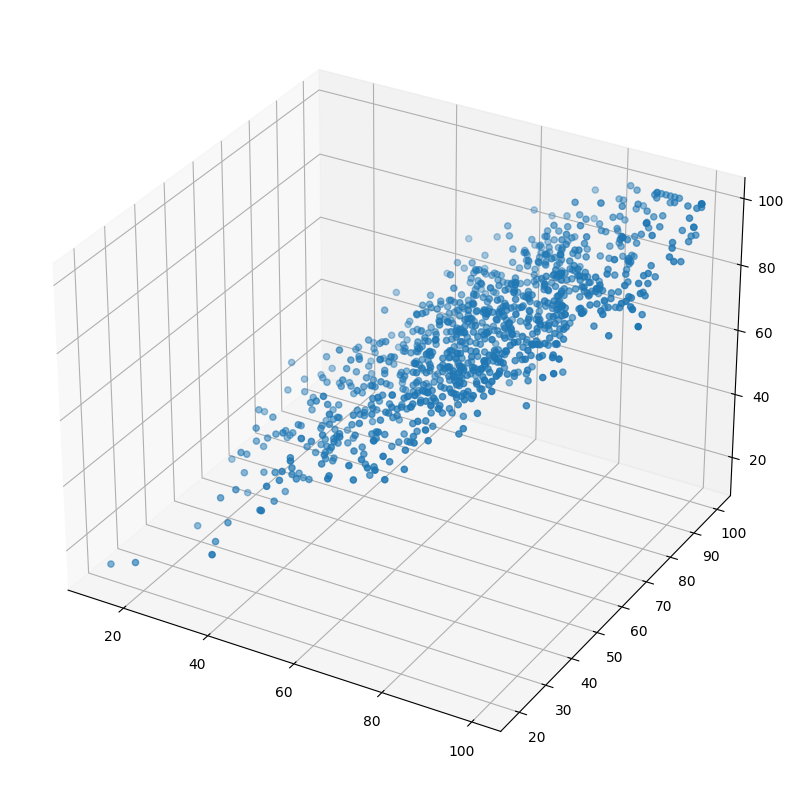

In [39]:
# from mpl_toolkits.mplot3d import Axes3D
# # Ploting the scores as scatter plot
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(math, read, write, color='#ef1234')
# plt.show()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(math, read, write)
plt.show()

### Store the arrays in the Matrix Form:
Implement Following Equations:

\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
    \end{align}
In Machine Learning parameters $\theta$ are also called weights, so from this step onwards we represent $\theta$ as $\textbf{W}$.

Here-Now:
\begin{align}
        \mathbf{Y} = W^T X + W_0
    \end{align}

\begin{align}
        \mathbf{W} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

In [43]:
# initializing Matrices which act as an Container to hold our Data.
x0 = np.ones(len(math))
X2 = np.array([x0, math, read]).T
W = np.array([0, 0, 0])
Y2 = np.array(write)



In [48]:
print(Y2)

[ 63  72  78  79  62  85  83  41  80  77  64  90  45  77  70  46  76  44
  85  72  53  66  75  49  84  83  68  66  77  78  74  83  72  65  46  66
  50  79  68  46  86  70  61  53  72  75  50  77 100  81 100  87  78  48
  50  44  48  43  67  78  58  91  92  78  42  85  73  83  61  58  60  55
  48  62  68  59  62  48  74  63  80  79  73  79  45  67  89  77  81  88
  53  68  79  77  63  73  60  67 100  79  26  51  80  57  41  78  68  49
  76  41  71  77  89  86  55  80  56  74  85  80  73  74  86  56  53  44
  41  59  71  81  74  78  67  53  56  75  82  79  99  76  59  96  75  61
  56  88  65 100  79  55  61  83  74  59  54  47  82  74  59  74  84  59
  43  65  61  78  84  73  73  92  63  72  61  59  70  87  78  65  73  62
  69  55  73  63  67  86  78  85  83  80  60  90  56  70  55  80  82  60
  78  76  94  75  68  71  85  46  58  46  84  58  57  59  77  63  68  99
  48  91  57  80  46  75  59  87  82  79  66  68  66  61  66  63  72  73
  77  84  83  42  72  76  76  39  74  43  63  74  5

## Step-2: Implement a Error/Cost Function.

We will use the Cost function: Mean Square Error i.e.
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(y_{pred} - y_i)^2
    \end{align}

Further Simplifications:

\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x_i) - y_i)^2
    \end{align}
Here:
\begin{align}
  h_\theta = \theta_1*x
    \end{align}

Note:
In Machine Learning, m: denotes the length of the array (total No of rows in our case).



In [ ]:
#Define the cost function
def cost_function(X, Y, W):
    """ Parameters:
    This function finds the Mean Square Error.
    Input parameters:
      X: Feature Matrix
      Y: Target Matrix
      W: Weight Matrix
    Output Parameters:
      J: accumulated mean square error.
    """
    m = len(Y) # len of data in your datasets

    J = np.sum((X.dot(W) - Y) ** 2)/(2 * m)
    return J

In [ ]:
inital_cost = cost_function(X2, Y2, W)
print(inital_cost)

2470.11


## Step-3: Optimization Algorithm

Our goal in this task is to minimize our error function with each input of examples(input data).
One of the most suitable methods to do the same is
\begin{align}
$\color{red}{\textbf{GRADIENT DESCENT ALGOROTHIM.}}$
\end{align}

Implement GDA from Scratch.

Function to estimate:
  *   $h_\theta(x) = \theta^T x$

Loss function to minimize:
  *   $(h_\theta(x) - y)^2$

Gradient: Decsent update:
  *   $\theta_(j+1)   = \theta_j - LR(D_\theta)$
  *   $D(\theta) = 1/m * (\theta^T * X)$ i.e. Derivative of parameters/weights.





In [ ]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        # Hypothesis Values
        Y_pred = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = Y_pred - Y
        # Gradient Calculation
        dw = (X.T.dot(loss) ) / (m)
        # Changing Values of B using Gradient
        W_update = W - alpha * dw
        # New Cost Value
        cost = cost_function(X, Y, W_update)
        cost_history[iteration] = cost

    return W_update, cost_history


In [ ]:
# 100000 Iterations
alpha = 0.0001 # Learning Rate.
new_weights, cost_history = gradient_descent(X2, Y2, W, alpha, 100000)

# New Values of
print(new_weights)

# Final Cost of our Iterations.
print(cost_history[-1])

[0.0068616 0.4801185 0.5006844]
18.076027940915417


## Step-4: Evaluate a Model.

In this section, we will use $b_1$ and $b_0$ calculated from step-2 to make a prediction.

Lets see How Good is our model. As discussed in the lecture and Tutorial we will use Root Mean Squared Error and Coefficient of Determination( R2 )
Mathematically:
\begin{align}
        \mathbf{RMSE}  = \sqrt{\sum_{i=1}^n (1/m (\hat{y_i} - y_i)^2)}
    \end{align}

\begin{align}
        \mathbf{R^2}  = 1 - \frac{SSR}{SST}
    \end{align}

\begin{align}
         \mathbf{SST} = \sum_{i=1}^n (y_i - \bar{y})^2
    \end{align}
\begin{align}
         \mathbf{SSR} = \sum_{i=1}^n (y_i - \hat{y_i})^2
    \end{align}

In [ ]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
    rmse: Root Mean Square.
  """
  rmse = np.sqrt(sum((Y-Y_pred)**2)/len(Y))
  return rmse

# Model Evaluation - R2

def r2(Y, Y_pred):
  """
   This Function calculates the R Squared Error.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
    rsquared: R Squared Error.
    """
  mean_y = np.mean(Y)
  ss_tot = sum((Y - mean_y) ** 2)
  ss_res = sum((Y - Y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2


# Let's Check Model Performance:


In [ ]:
Y_pred = X2.dot(new_weights)

print(rmse(Y2, Y_pred))
print(r2(Y2, Y_pred))

6.01265797146577
0.8442155132417348


# Section-2: Introduction to SKLEARN.
What is scikit-learn or sklearn?
>  

1.   Scikit-learn is probably the most useful library for machine learning in python.
2.   The sklearn library contains a lot of efficient tools for machine learning and statistical modeling

> Please note that sklearn is used to build machine learning models. It should not be used for reading the data, manipulating and summarizing it. There are better libraries for that (e.g. NumPy, Pandas etc.)


## Build Linear Regression with help of SKLEARN.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

4.572887051836439
0.9098901726717316


# Practise Tasks:

For the following Datasets:

Salary.csv: Try implementing Linear Regression with OLS and explain the Result.

Insurance.csv: Try implementing Multiple Linear Regression from Scratch: While Doing that also practise following:
  1.   Can you Identify Qualitative and Quantitative Varaible.
  2.   Drop all the Qualitative Varaible from the dataframe.
  3.   If you do not want to drop the qualitative varaible, you can convert them into numeric variable as you did in Assignment-1. {You can also try sklearn label encoder function.}
  4.   Practise your Visualization Skills.
  

